In [3]:
import numpy as np
import matplotlib as plt
from einsteinpy.geodesic import Timelike
from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting.geodesic import StaticGeodesicPlotter
from einsteinpy.hypersurface import SchwarzschildEmbedding
from einsteinpy.plotting import HypersurfacePlotter
from astropy import units as u
from einsteinpy.coordinates import SphericalDifferential
from einsteinpy.metric import Schwarzschild
from einsteinpy.geodesic import Geodesic

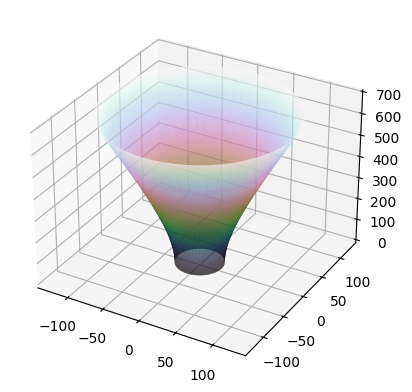

In [4]:
# Visualize Schwarzchild Black hole
surface_obj = SchwarzschildEmbedding(5.927e23 * u.kg)
surface = HypersurfacePlotter(embedding=surface_obj, plot_type='surface')
surface.plot()
surface.show()

In [41]:
def toSpherical(x, y, z): #function to convert cartesian coordinates to spherical
    r       =  np.sqrt(x*x + y*y + z*z)
    theta   =  np.arcos(z/r)
    phi     =  np.atan2(y,x)
    return [r,theta,phi]

In [7]:
# Positions given by r, theta, phi
position = np.array([40., np.pi / 2, 0.])
momentum = np.array([0.0, 0.0, 3.83405]) 

# Spin is 0 since Schwarzchild black holes do not rotate
a = 0

# Solver steps (increasing steps reduces precision but speeds up computation)
steps = 5500

# Step size
delta = 1

geod1 = Timelike(
    metric="Schwarzschild",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True
)

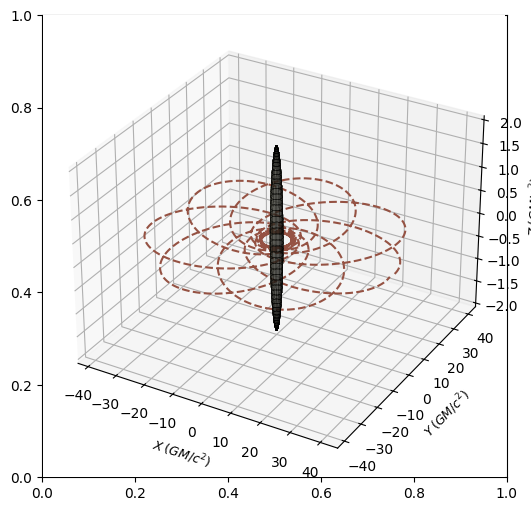

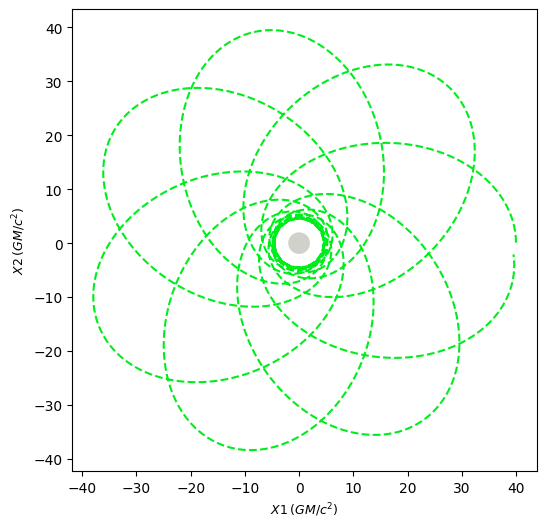

In [8]:
sgpl = StaticGeodesicPlotter()
sgpl.plot(geod1)
sgpl.plot2D(geod1, coordinates=(1, 2))

In [50]:
# Create light source
r = 2  # Radius of the spherical light source

# Generate arrays for theta and phi
theta = np.linspace(0, np.pi, 10)  # Polar angle from 0 to pi
phi = np.linspace(0, 2 * np.pi, 10)  # Azimuthal angle from 0 to 2pi

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Translate the sphere away from the location of the BH
x += 3
r_new = np.sqrt(x**2 + y**2 + z**2)
theta_new = np.arccos(z / r_new)
phi_new = np.arctan2(y, x)

l_pos = []
l_mom = np.tile([1, np.pi / 2, np.pi], (10, 1)).tolist()

for i in range(len(r_new)):
    r1 = r_new[i]
    t1 = theta_new[i]
    p1 = phi_new[i]
    l_pos.append([r1, t1, p1])

light_origins = []
for i in range(len(l_pos)):
    pos = l_pos[i]
    mom = l_mom[i]
    geod = Nulllike(
        metric="Schwarzschild",
        metric_params=(.99,),
        position=pos,
        momentum=mom,
        steps=7440,
        delta=0.05,
        omega=.001,
        return_cartesian=True
    )
    light_origins.append(geod)

c:\Users\anuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\einsteinpy\integrators\fantasy.py:287: RuntimeWarning:

Numerical error has exceeded specified tolerance at step = 3391.

c:\Users\anuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\einsteinpy\integrators\fantasy.py:287: RuntimeWarning:

Numerical error has exceeded specified tolerance at step = 3392.

c:\Users\anuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\einsteinpy\integrators\fantasy.py:287: RuntimeWarning:

Numerical error has exceeded specified tolerance at step = 3393.

c:\Users\anuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\einsteinpy\integrators\fantasy.py:287: RuntimeWarning:

Numerical error has exceeded specified tolerance at step = 3394.

c:\Users\anuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\einsteinpy\integrators\fantasy.py:287: RuntimeWarning:

Numerical error has exceeded specified tolerance at step = 3395.

c:\Users\anuta\AppData\Lo

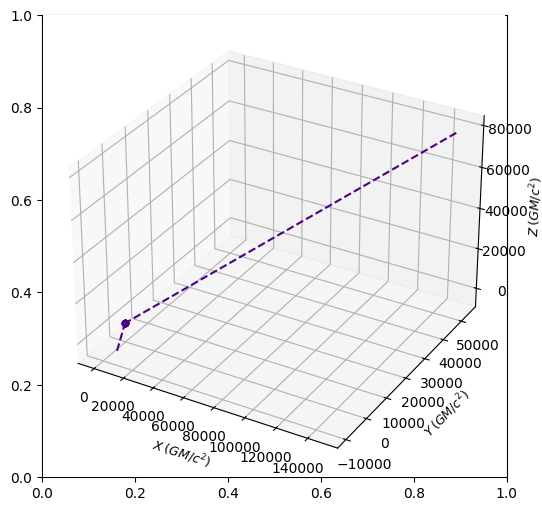

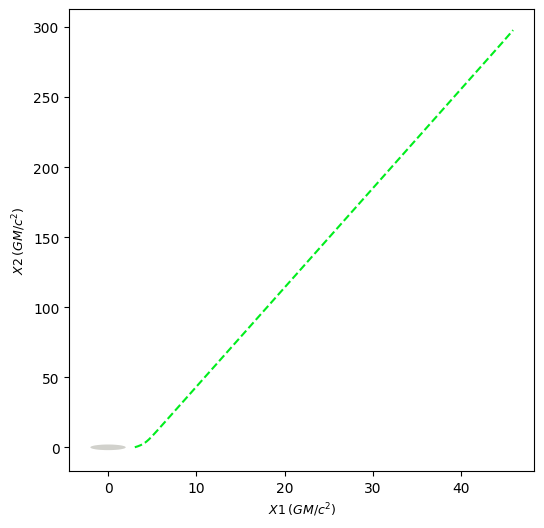

In [54]:
sgpl2 = StaticGeodesicPlotter()
sgpl2.plot(light_origins[0])

for geodesic in light_origins:
        traj = geodesic.trajectory[1]
        x = traj[:, 1]
        y = traj[:, 2]
        z = traj[:, 3]

        sgpl2.ax.scatter(x[0], y[0], z[0], color="indigo", s=20, label="start")
        sgpl2.ax.plot(x, y, z, "--", color="indigo", label=geodesic.kind + " Geodesic")

sgpl2.plot2D(light_origins[0])


In [39]:
positions = [toSpherical(1.0,-2.0,0), toSpherical(1.5,-2.0,0), toSpherical(2.00,-2.0,0), toSpherical(2.5,-2.0,0), toSpherical(3.0,-2.0,0)]
momentums = [[0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2]]

geodesics = []
for i in range(len(positions)):
    pos = positions[i]
    mom = momentums[i]
    geod = Nulllike(
        metric="Kerr",
        metric_params=(.99,),
        position=pos,
        momentum=mom,
        steps=1000,
        delta=0.01,
        omega=.01,
        return_cartesian=True
    )
    geodesics.append(geod)


AttributeError: module 'numpy' has no attribute 'acos'

NameError: name 'geodesics' is not defined

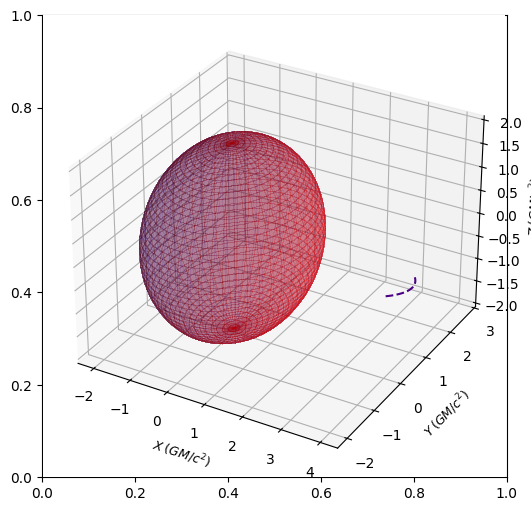

In [19]:
sgpl3 = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl3.plot(geod, color="indigo")
for geodesic in geodesics:
        traj = geodesic.trajectory[1]
        x = traj[:, 1]
        y = traj[:, 2]
        z = traj[:, 3]
        
        sgpl3.ax.scatter(x[0], y[0], z[0], color="indigo", s=20, label="start")
        sgpl3.ax.plot(x, y, z, "--", color="indigo", label=geodesic.kind + " Geodesic")